# MEEP 相应的特殊形状设置测试

2023 08 13

在一些情况下，我们需要计算布里渊区的基矢不垂直，同时原胞内的形状不是内置的形状，而是六角形、三角形等，这时候得用函数`Prism`来实现，但是我发现这似乎是MPB的一个BUG，实现出来的分布总是不对，相关问题为：

https://github.com/NanoComp/mpb/issues/160

下面设置了五种实现方法
```python
# (1) For squares in cartesian coordinates
# s=0.125
# vertices1 = [mp.Vector3(-1*s,-1*s),
#              mp.Vector3(-1*s,1*s),
#              mp.Vector3(s*1,s*1),
#              mp.Vector3(1*s,-1*s)]
# geometry=[mp.Prism(vertices1, height=mp.inf, center=mp.Vector3(0,0), material=slab)]

#(2) For squares in Lattice coordinates method 1
# s=0.125
# vertices1 = [mp.cartesian_to_lattice(mp.Vector3(-1*s,-1*s),geometry_lattice),
#              mp.cartesian_to_lattice(mp.Vector3(-1*s,1*s),geometry_lattice),
#              mp.cartesian_to_lattice(mp.Vector3(s*1,s*1),geometry_lattice),
#              mp.cartesian_to_lattice(mp.Vector3(1*s,-1*s),geometry_lattice)]
# geometry=[mp.Prism(vertices1, height=mp.inf, center=mp.Vector3(0,0), material=slab)]

# # (3) For squares in Lattice coordinates method 2
# s=0.125
# geometry=[mp.Block(mp.Vector3(0.25,0.25),center=mp.Vector3(0,0), material=slab)]

# #(4) For squares in Lattice coordinates method 2
# s=0.125
# geometry=[mp.Block(mp.Vector3(0.25,0.25),center=mp.Vector3(0,0), material=slab,
#                   e1 = mp.cartesian_to_lattice(mp.Vector3(1,0,0), geometry_lattice),
#                   e2 = mp.cartesian_to_lattice(mp.Vector3(0,1,0), geometry_lattice))]

# # #(5) For squares in Lattice coordinates method 3
# s=0.2
# vertices1 = [mp.Vector3(0*s,0*s),
#              mp.Vector3(1*s,0*s),
#              mp.Vector3(s*3/2,s*np.sqrt(3)/2),
#              mp.Vector3(s*1/2,s*np.sqrt(3)/2),]
# geometry=[mp.Prism(vertices1, height=mp.inf, center=mp.Vector3(0,0), material=slab,axis=mp.Vector3(0,0,1))]

# # #(6) For triangle in Lattice coordinates
#s1=0.2
#vertices1 = [mp.Vector3(-1*s1,0),
#            mp.Vector3(0*s1,math.sqrt(3)/2*s1),
#            mp.Vector3(1*s1,0),]
#geometry=[mp.Prism(vertices1, height=mp.inf, center=mp.Vector3(0,0), material=slab,axis=mp.Vector3(0,0,1))]
```

In [1]:
# we first use the function mp.cartesian_to_lattice to transform the coordinates
import math

import meep as mp
from meep import mpb
import numpy as np
# A triangular lattice of dielectric rods in air.  (This structure has
# a band_gap for TM fields.)  This file is used in the "Data Analysis
# Tutorial" section of the MPB manual.

num_bands = 8


nslab = 2.48
slab = mp.Medium(index=nslab)


# # Lattice geometry I
# geometry_lattice = mp.Lattice(
#     size=mp.Vector3(1, 1),
#     basis2=mp.Vector3(0.5,math.sqrt(3) / 2),
#     basis1=mp.Vector3(1, 0),
# )

# Lattice geometry II
geometry_lattice = mp.Lattice(
    size=mp.Vector3(1, 1),
    basis2=mp.Vector3(0,1),
    basis1=mp.Vector3(1, 0),
)

# (1) For squares in cartesian coordinates
# s=0.125
# vertices1 = [mp.Vector3(-1*s,-1*s),
#              mp.Vector3(-1*s,1*s),
#              mp.Vector3(s*1,s*1),
#              mp.Vector3(1*s,-1*s)]
# geometry=[mp.Prism(vertices1, height=mp.inf, center=mp.Vector3(0,0), material=slab)]



#(2) For squares in Lattice coordinates method 1
# s=0.125
# vertices1 = [mp.cartesian_to_lattice(mp.Vector3(-1*s,-1*s),geometry_lattice),
#              mp.cartesian_to_lattice(mp.Vector3(-1*s,1*s),geometry_lattice),
#              mp.cartesian_to_lattice(mp.Vector3(s*1,s*1),geometry_lattice),
#              mp.cartesian_to_lattice(mp.Vector3(1*s,-1*s),geometry_lattice)]
# geometry=[mp.Prism(vertices1, height=mp.inf, center=mp.Vector3(0,0), material=slab)]

# # (3) For squares in Lattice coordinates method 2
# s=0.125
# geometry=[mp.Block(mp.Vector3(0.25,0.25),center=mp.Vector3(0,0), material=slab)]

# #(4) For squares in Lattice coordinates method 2
# s=0.125
# geometry=[mp.Block(mp.Vector3(0.25,0.25),center=mp.Vector3(0,0), material=slab,
#                   e1 = mp.cartesian_to_lattice(mp.Vector3(1,0,0), geometry_lattice),
#                   e2 = mp.cartesian_to_lattice(mp.Vector3(0,1,0), geometry_lattice))]

# # #(5) For squares in Lattice coordinates method 3
# s=0.2
# vertices1 = [mp.Vector3(0*s,0*s),
#              mp.Vector3(1*s,0*s),
#              mp.Vector3(s*3/2,s*np.sqrt(3)/2),
#              mp.Vector3(s*1/2,s*np.sqrt(3)/2),]
# geometry=[mp.Prism(vertices1, height=mp.inf, center=mp.Vector3(0,0), material=slab,axis=mp.Vector3(0,0,1))]

# # #(6) For triangle in Lattice coordinates
s1=0.2
vertices1 = [mp.Vector3(-1*s1,0),
            mp.Vector3(0*s1,math.sqrt(3)/2*s1),
            mp.Vector3(1*s1,0),]
geometry=[mp.Prism(vertices1, height=mp.inf, center=mp.Vector3(0,0), material=slab,axis=mp.Vector3(0,0,1))]

# 注意倒格矢空间
k_points = [
    mp.Vector3(),  # Gamma
    mp.Vector3(y=0.5),  # M
    mp.Vector3(1 / -3, 1 / 3),  # K
    mp.Vector3(),  # Gamma
]

k_points = mp.interpolate(4, k_points)

resolution = 32

ms = mpb.ModeSolver(
    geometry=geometry,
    geometry_lattice=geometry_lattice,
    k_points=k_points,
    resolution=resolution,
    num_bands=num_bands,
)

ms.run_tm()
tm_freqs = ms.all_freqs
tm_gaps = ms.gap_list

Using MPI version 4.0, 1 processes
Initializing eigensolver data
Computing 8 bands with 1e-07 tolerance
Working in 2 dimensions.
Grid size is 32 x 32 x 1.
Solving for 8 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (1, 0, 0)
     (0, 1, 0)
     (0, 0, 1)
Cell volume = 1
Reciprocal lattice vectors (/ 2 pi):
     (1, -0, 0)
     (-0, 1, -0)
     (0, -0, 1)
Geometric objects:
     prism, center = (0,0,0)
          height 1e+20, axis (0,0,1), sidewall angle: 0 radians, 3 vertices:
          (-0.2,-0.057735,-5e+19)
          (0,0.11547,-5e+19)
          (0.2,-0.057735,-5e+19)
Geometric object tree has depth 1 and 1 object nodes (vs. 1 actual objects)
Initializing epsilon function...
Allocating fields...
Solving for band polarization: tm.
Initializing fields to random numbers...
16 k-points
  Vector3<0.0, 0.0, 0.0>
  Vector3<0.0, 0.1, 0.0>
  Vector3<0.0, 0.2, 0.0>
  Vector3<0.0, 0.30000000000000004, 0.0>
  Vector3<0.0, 0.4, 0.0>
  Vector3<0.0, 0.5, 0.0>
  Ve

/home/tzh/miniconda3/envs/pmp/lib/python3.11/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/tzh/miniconda3/envs/pmp/lib/python3.11/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/home/tzh/miniconda3/envs/pmp/lib/python3.11/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/tzh/miniconda3/envs/pmp/lib/python3.11/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


, 1.31054
elapsed time for k point: 0.174574613571167
solve_kpoint (0,0.1,0):
Solving for bands 1 to 8...
    linmin: converged after 4 iterations.
    iteration    1: trace = 7.740087663161821 (0.399957% change)
    linmin: converged after 3 iterations.
    iteration    2: trace = 7.730614264584174 (0.122469% change)
    linmin: converged after 3 iterations.
    iteration    3: trace = 7.729618574807739 (0.0128807% change)
    linmin: converged after 2 iterations.
    iteration    4: trace = 7.729460010397705 (0.00205141% change)
    linmin: converged after 2 iterations.
    iteration    5: trace = 7.72941307078495 (0.000607284% change)
    linmin: converged after 2 iterations.
    iteration    6: trace = 7.729408548874139 (5.85027e-05% change)
    linmin: converged after 2 iterations.
    iteration    7: trace = 7.729407970868873 (7.478e-06% change)
Finished solving for bands 1 to 8 after 7 iterations.
tmfreqs:, 2, 0, 0.1, 0, 0.1, 0.087586, 0.678083, 0.838575, 0.917714, 1.04533, 1.16

    linmin: converged after 4 iterations.
    iteration   41: trace = 7.930846714579004 (0.00496653% change)
    linmin: converged after 3 iterations.
    iteration   42: trace = 7.930493884884138 (0.00444893% change)
    linmin: converged after 3 iterations.
    iteration   43: trace = 7.930177725281315 (0.00398671% change)
    linmin: converged after 3 iterations.
    iteration   44: trace = 7.929892560755674 (0.00359601% change)
    linmin: converged after 3 iterations.
    iteration   45: trace = 7.929633050307244 (0.00327261% change)
    linmin: converged after 3 iterations.
    iteration   46: trace = 7.929394707979512 (0.00300576% change)
    linmin: converged after 3 iterations.
    iteration   47: trace = 7.929173941168155 (0.0027842% change)
    linmin: converged after 3 iterations.
    iteration   48: trace = 7.92896792560051 (0.00259823% change)
    linmin: converged after 3 iterations.
    iteration   49: trace = 7.928774449149451 (0.00244015% change)
    linmin: converged

    linmin: converged after 4 iterations.
    iteration    5: trace = 7.835742504861031 (0.00382884% change)
    linmin: converged after 2 iterations.
    iteration    6: trace = 7.835697789602364 (0.000570659% change)
    linmin: converged after 2 iterations.
    iteration    7: trace = 7.835686118987441 (0.000148942% change)
    linmin: converged after 2 iterations.
    iteration    8: trace = 7.835683799921153 (2.95962e-05% change)
    linmin: converged after 2 iterations.
    iteration    9: trace = 7.835683186703939 (7.82596e-06% change)
Finished solving for bands 1 to 8 after 9 iterations.
tmfreqs:, 8, -0.133333, 0.433333, 0, 0.453382, 0.371573, 0.531301, 0.788161, 0.927656, 0.994018, 1.21569, 1.28842, 1.34447
elapsed time for k point: 0.1122899055480957
solve_kpoint (-0.2,0.4,0):
Solving for bands 1 to 8...
    linmin: converged after 4 iterations.
    iteration    1: trace = 7.820275458877036 (0.145689% change)
    linmin: converged after 4 iterations.
    iteration    2: trace

Finished solving for bands 1 to 8 after 8 iterations.
tmfreqs:, 14, -0.133333, 0.133333, 0, 0.188562, 0.164464, 0.65926, 0.810422, 0.938628, 1.05168, 1.12311, 1.25923, 1.31208
elapsed time for k point: 0.11866497993469238
solve_kpoint (-0.0666667,0.0666667,0):
Solving for bands 1 to 8...
    linmin: converged after 3 iterations.
    iteration    1: trace = 7.699345545869026 (0.266403% change)
    linmin: converged after 3 iterations.
    iteration    2: trace = 7.688518110830288 (0.140727% change)
    linmin: converged after 3 iterations.
    iteration    3: trace = 7.685810323210587 (0.0352248% change)
    linmin: converged after 4 iterations.
    iteration    4: trace = 7.684718484727368 (0.0142069% change)
    linmin: converged after 4 iterations.
    iteration    5: trace = 7.684433817700801 (0.00370439% change)
    linmin: converged after 2 iterations.
    iteration    6: trace = 7.684357172601468 (0.000997412% change)
    linmin: converged after 2 iterations.
    iteration    7: 

每一种方法，都可以通过折射率分布来观察

epsilon: 1-6.1504, mean 1.29961, harm. mean 1.0569, 6.93359% > 1, 5.8172% "fill"
real part range: 1 .. 6.1504


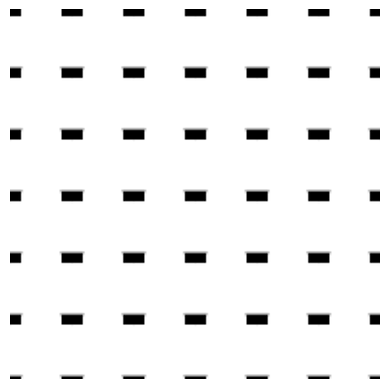

epsilon: 1-6.1504, mean 1.29961, harm. mean 1.0569, 6.93359% > 1, 5.8172% "fill"
real part range: 1 .. 6.1504


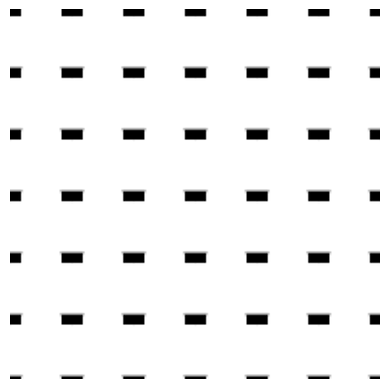

In [2]:
import matplotlib.pyplot as plt
md = mpb.MPBData(rectify=False, periods=6, resolution=64)
eps = ms.get_epsilon()
converted_eps = md.convert(eps)

plt.imshow(converted_eps.T, interpolation='spline36', cmap='binary')
plt.axis('off')
plt.show()

md = mpb.MPBData(rectify=True, periods=6, resolution=64)
eps = ms.get_epsilon()
converted_eps = md.convert(eps)

plt.imshow(converted_eps.T, interpolation='spline36', cmap='binary')
plt.axis('off')
plt.show()

可以看到三角形、圆柱形都不能很好的工作